Hard Additional Requirement 2

The aim of this additional requirment is to analyse some other data sets.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from ipywidgets import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
from operator import itemgetter

import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.plotly as py

from ipywidgets import widgets 
from IPython.display import display
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
init_notebook_mode(connected=True)

The data set being analysed in this notebook is data that NASA has collected. https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

In [19]:
df=pd.read_csv("Meteorite_Landings.csv")

In [20]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [21]:
refinedNASA = df.copy()
refinedNASA = refinedNASA.dropna()
refinedNASA = refinedNASA.drop_duplicates()

In [22]:
fallarray = ['Fell', 'Found']
nametypearray = ['Valid', 'Relict']

rowsToRemove = []

rCounter = 0
falls = refinedNASA['fall']
for fa in falls:
    flag = 1
    for f in fallarray:
                if f == fa:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
types = refinedNASA['nametype']  
for typ in types:
    flag = 1
    for name in nametypearray:
                if name == typ:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
     
rowsToRemove.sort(reverse=True)

for i in rowsToRemove:
    refinedNASA = refinedNASA.drop(refinedNASA.index[[i]])

refinedNASA.to_csv("refinedNASA.csv")


In [23]:
len(refinedNASA)

38116

Finding all the possible values for each column and their occurances, all except 'name' and 'id'.

In [24]:
nametype = refinedNASA.groupby('nametype')
nametype.size()

nametype
Relict       21
Valid     38095
dtype: int64

In [25]:
recclass = refinedNASA.groupby('recclass')
recclass.size()

recclass
Acapulcoite               37
Acapulcoite/Lodranite      5
Acapulcoite/lodranite      1
Achondrite-prim            3
Achondrite-ung            36
Angrite                   10
Aubrite                   53
Aubrite-an                 5
Brachinite                23
C                          8
C1/2-ung                   1
C2                         1
C2-ung                    13
C3-ung                    10
C3.0-ung                   1
C4                         2
C4-ung                     3
C4/5                       1
C5/6-ung                   1
C6                         2
CB                         6
CBa                        4
CBb                        4
CH/CBb                     1
CH3                       19
CI1                        7
CK                         1
CK3                        7
CK3-an                     2
CK4                       54
                        ... 
OC                        69
Pallasite                 16
Pallasite, PES             3
Palla

In [26]:
fall = refinedNASA.groupby('fall')
fall.size()

fall
Fell      1065
Found    37051
dtype: int64

In [27]:
year = refinedNASA.groupby('year')
year.size()

year
01/01/1583 12:00:00 AM       1
01/01/1600 12:00:00 AM       1
01/01/1621 12:00:00 AM       1
01/01/1623 12:00:00 AM       1
01/01/1628 12:00:00 AM       1
01/01/1632 12:00:00 AM       1
01/01/1637 12:00:00 AM       1
01/01/1668 12:00:00 AM       1
01/01/1671 12:00:00 AM       1
01/01/1688 12:00:00 AM       1
01/01/1715 12:00:00 AM       1
01/01/1716 12:00:00 AM       1
01/01/1723 12:00:00 AM       1
01/01/1724 12:00:00 AM       1
01/01/1740 12:00:00 AM       1
01/01/1741 12:00:00 AM       1
01/01/1749 12:00:00 AM       1
01/01/1751 12:00:00 AM       1
01/01/1753 12:00:00 AM       2
01/01/1766 12:00:00 AM       1
01/01/1768 12:00:00 AM       2
01/01/1773 12:00:00 AM       1
01/01/1775 12:00:00 AM       1
01/01/1776 12:00:00 AM       1
01/01/1781 12:00:00 AM       1
01/01/1784 12:00:00 AM       2
01/01/1785 12:00:00 AM       1
01/01/1787 12:00:00 AM       1
01/01/1790 12:00:00 AM       1
01/01/1792 12:00:00 AM       1
                          ... 
01/01/1991 12:00:00 AM     869
01/

In [28]:
reclat = refinedNASA.groupby('reclat')
reclat.size()

reclat
-87.36667      4
-87.03333      3
-86.93333      3
-86.71667    217
-86.56667     17
-86.54488      1
-86.53790      1
-86.53734      1
-86.53725      1
-86.53035      1
-86.52673      1
-86.52653      1
-86.52607      1
-86.52309      1
-86.52308      1
-86.52222      1
-86.52157      1
-86.52146      1
-86.51339      1
-86.51327      1
-86.51027      1
-86.50994      1
-86.50985      1
-86.50015      1
-86.48087      1
-86.47899      1
-86.46973      1
-86.45000      9
-86.36667    226
-86.15351      1
            ... 
 63.30000      1
 63.33333      1
 63.73333      1
 63.80000      1
 63.91667      2
 64.02000      1
 64.40000      1
 64.43333      1
 64.45000      1
 64.70000      1
 64.88333      1
 65.38333      1
 66.00000      1
 66.13889      1
 66.34833      1
 66.40000      1
 66.80000      2
 66.90000      1
 67.30000      1
 67.80000      1
 67.88333      1
 68.00000      1
 69.10000      1
 70.00000      1
 70.73333      1
 72.68333      1
 72.88333      1
 76.133

In [29]:
reclong = refinedNASA.groupby('reclong')
reclong.size()

reclong
-165.43333       9
-165.11667      17
-163.16667       1
-162.55000       1
-157.86667       1
-157.78333       1
-149.50000       4
-148.55000       2
-148.00000       3
-146.26667       1
-144.30000       1
-141.50000     217
-139.33333       2
-137.80000       1
-137.70000       1
-136.00000       1
-134.20139       1
-125.00000       4
-124.74950       1
-124.29386       1
-124.29004       1
-124.28507       1
-124.25279       1
-124.21560       1
-123.97255       1
-123.96975       1
-123.96556       1
-123.91361       1
-123.84895       1
-123.83598       1
              ... 
 162.77784       1
 162.78483       1
 162.79943       1
 162.82712       1
 162.93682       1
 162.93706       1
 162.94324       1
 162.94855       1
 162.96276       1
 163.67432       1
 163.75571       1
 164.20000       1
 165.00000       1
 165.90000       1
 166.50000      11
 167.50000       1
 168.00000    3040
 168.40000       1
 171.13333       1
 171.35000       1
 172.06333       1
 172

In [30]:
GeoLocation = refinedNASA.groupby('GeoLocation')
GeoLocation.size()

GeoLocation
(-1.002780, 37.150280)      1
(-1.216670, 30.000000)      1
(-1.450000, 29.833330)      1
(-1.870890, -79.957560)     1
(-10.059440, 33.395000)     1
(-10.116670, -39.200000)    1
(-10.266670, 38.766670)     1
(-10.666670, 35.500000)     1
(-10.750000, -39.216670)    1
(-11.500000, 33.500000)     1
(-11.850000, 15.833330)     1
(-12.263330, 136.838330)    1
(-13.016670, 34.200000)     1
(-13.123330, -42.288500)    1
(-13.666670, 33.916670)     1
(-14.200000, 48.100000)     1
(-14.250000, 132.016670)    1
(-14.258000, -49.159170)    1
(-14.367500, -43.022780)    1
(-14.533210, -75.775110)    1
(-14.533330, -48.766670)    1
(-14.666670, -74.500000)    1
(-14.838610, -40.836110)    1
(-15.000000, 135.000000)    1
(-15.183330, 35.283330)     1
(-15.212220, 35.242220)     1
(-15.700000, 135.666670)    1
(-16.216670, -50.300000)    1
(-16.266670, -47.950000)    1
(-16.500000, 14.000000)     1
                           ..
(67.300000, 160.800000)     1
(67.800000, 23.100000)      

In [35]:
refinedNASA['recclass'].value_counts().plot(kind="bar", figsize=(155, 150))
plt.show()

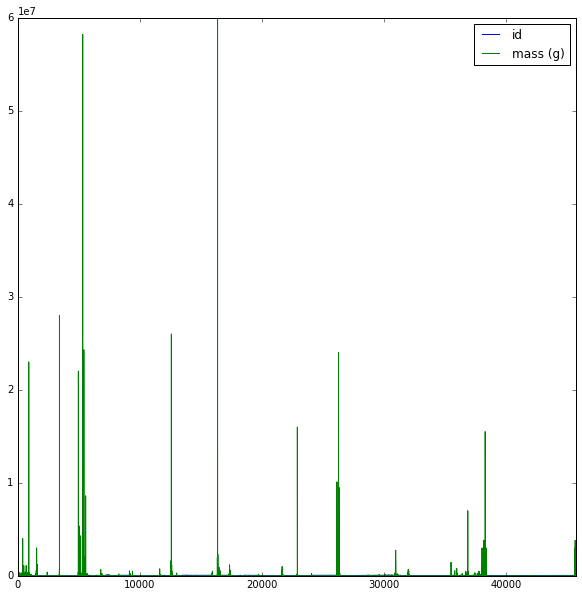

In [42]:
refinedNASA[['id', 'mass (g)']].plot(kind="line", figsize=(10,10))
plt.show()

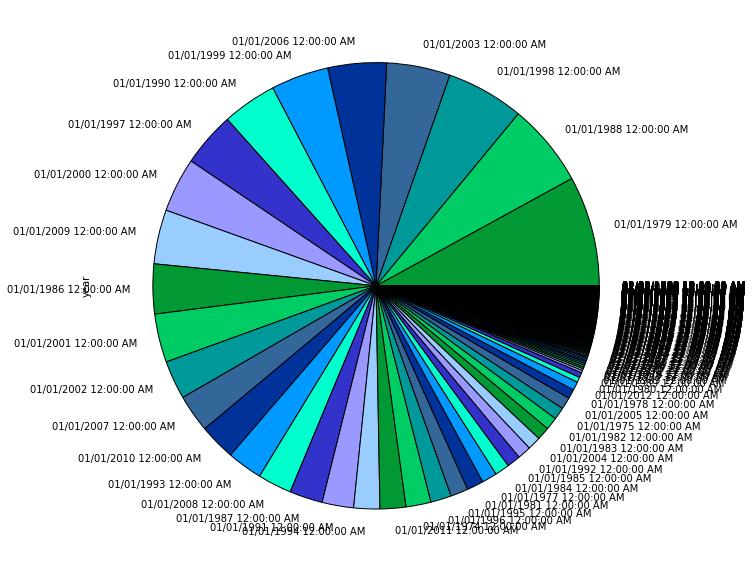

In [49]:
colors = ['#009933', '#00cc66', '#009999', '#336699', '#003399', '#0099ff', '#00ffcc', '#3333cc', '#9999ff', '#99ccff']
possibleYears = refinedNASA.year.unique()

data = refinedNASA.copy()

rCounter = 0
years = data['year']  
for year in years:
    flag = 1
    for possible in possibleYears:
                if year == possible:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
 
rowsToRemove.sort(reverse=True)

for i in rowsToRemove:
    refinedData = refinedData.drop(refinedData.index[[i]])


refinedNASA['year'].value_counts().plot(kind="pie", colors = colors, figsize=(10,10))

plt.show()

In [33]:
#make some groupby objects and then make a 3D graph for them

In [34]:
#make some widgets